In [1]:
from math import log
import numpy as np
import gurobipy as gp
import matplotlib.pyplot as plt
from matching import neg_log_bayes, miqcp
from gurobi import GRB, Model, quicksum
import pandas as pd
import time
from matching import run_cop_kmeans, run_kmeans

plt.rcParams['text.usetex'] = True

In [2]:
def simulate_two_objects(sigma1: float = 0.04, sigma2: float = 0.04, distance:float = 0.04, num: int = 10):
    """Simulate two overlapping objects.

    Args:
        sigma1 (float, optional): Sigma to use for first object. Defaults to 0.04.
        sigma2 (float, optional): Sigma to use for second object. Defaults to 0.04.
        distance (float, optional): distance between center of objects. Defaults to 0.04.
        num (int, optional): number of sources to generate for each object. Defaults to 10.
    """
    center1 = np.array([-distance / 2, 0])
    center2 = np.array([distance / 2, 0])

    sources1 = np.random.multivariate_normal(center1, np.eye(2) * (sigma1**2), (num))
    sources2 = np.random.multivariate_normal(center2, np.eye(2) * (sigma2**2), (num))

    imageIDs = [0] * (2 * num)
    for i in range(num):
        imageIDs[i] = i
        imageIDs[i+num] = i
        
    sigmas = ([sigma1] * num) + ([sigma2] * num)
    coords = np.vstack((sources1, sources2))
    df_dict = {"ImageID": imageIDs, 
               "Sigma": sigmas,
               "coord1 (arcseconds)": coords.T[0],
               "coord2 (arcseconds)": coords.T[1]}
    df = pd.DataFrame(df_dict)
    df["kappa"] = df["Sigma"] ** (-2)
    df["SourceID"] = df.index
    df["ObjectID"] = ([0] * num) + ([1] * num)

    return df

def time_method(df: pd.DataFrame, method, repeat: int = 5):
    """ Time a method.

    Args:
        df (pd.DataFrame): dataframe with coordinates and uncertainties
        method (function): method to run
        repeat (int, optional): number of time repeats. Defaults to 5.

    Returns:
        list: list of runtimes
    """
    times = []
    for _ in range(repeat):
        start_time = time.perf_counter()

        method(df)

        end_time = time.perf_counter()
        times.append(end_time - start_time)
    return times

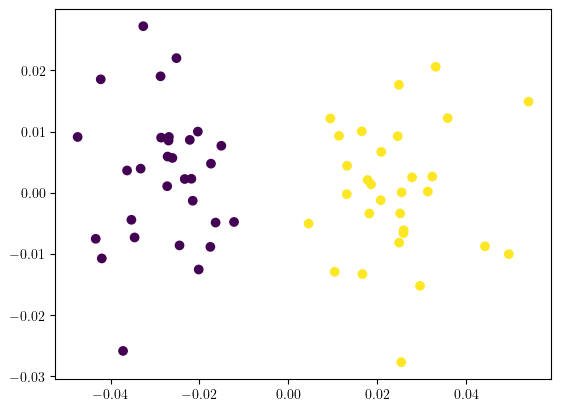

In [20]:
df = simulate_two_objects(sigma1 = 0.01, sigma2 = 0.01, distance=0.05, num=30)
plt.scatter(df["coord1 (arcseconds)"], df["coord2 (arcseconds)"],c=df.ObjectID)

In [21]:
miqcp_times = time_method(df, miqcp, repeat = 1)

In [16]:
miqcp_times

[3.994669604000592]